<h1 align="center">Zewail City of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2020)</h2>
<h2 align="center">Lab 10: SVM </h2>
<h3 align="center">Eng. Ahmed Wael</h3>

## Import the needed libraries

In [ ]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from google.colab import files

!pip install PyStemmer
import Stemmer

from sklearn.naive_bayes import GaussianNB


     |████████████████████████████████| 563kB 12.2MB/s 
  Created wheel for PyStemmer: filename=PyStemmer-2.0.1-cp36-cp36m-linux_x86_64.whl size=423622 sha256=12c1e9d2f48ebe39f87eef18322cf049284927b8bb1432755a91b7084a824885
  Stored in directory: /root/.cache/pip/wheels/f3/3c/11/ee323a09706e17a649c2730bd8819b06e887411ff7507acf7a
Successfully built PyStemmer


# Outline:

*   SVM Intuition


*   Hard vs Soft Margins


*   C hyper-parameter


*   Kernel Trick


*   Kernel Types


*   SVM with Linear Dataset


*   SVM with Non-linear Dataset


*   Hyper-parameter Tuning & Cross Validation


*   Multi-class SVM


*   SVM with Regression


*   Tasks



# SVM Intuition:

## What is the best hyper-plane?

### Case 1: Correct Classification

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_21.png>

**The best hyper-plane is the one that separates the two classes better**

**Therefore, B is best one in this case**

### Case 2: Maximizing the Margin

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_3.png>

**The three hyper-planes separate the two classes, but which of them is the best one?**

**We care about maximizing the distances between the nearest data point (either class) and hyper-plane**

**We call this distance The Margin**

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_4.png>

**Thus, C is the best hyper-plane.**

### Case 3: Correct Classification vs Maximizing the Margin

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_5.png>

**By default, SVM gives more weight to correct classification than margin maximization.**

**Thus, A is the best classifier in this case**

### Case 4: Outliers

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_71.png>

**SVM gives more weight to correct classification than margin maximization, right?**


**However, this also means that margin maximization is important!**

**Thus, SVM can detect outliers and ignore them**

### Case 5: Non-linear hyper-plane:

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_8.png>

**SVM solves this by introducing a new feature which is**

$$z = x^2 + y^2$$

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_9.png>

**This feature is NOT added manually**

**It is done using the KERNEL!**

## What is the SVM Kernel?

- It takes low dimensional input space and transforms it to a higher dimensional space


- Converts not separable problem to separable problem.


- Mostly useful in non-linear separation problem.

## Why Maximize Margin?

<img src=https://i.ibb.co/Qf5bzR2/1.jpg>

**This line not only separates
the two classes but also
stays as far away from the
closest training instances
as possible**

**Robust even with high margin of noise**

# Hard vs Soft Margins

## Margin Equation:

<img src=https://i.ibb.co/d7wXYw0/2.jpg>

**if we want to Maximize M**

$$M = \frac{2}{|w|}$$

**This means we want to minimize:**

$$ \frac{1}{2}w^Tw$$

**So, we have an optimization problem as follows:**

Find w and b such that:


- $$\phi(w) = \frac{1}{2}w^Tw$$ is minimized


- For all $${(x_i ,y_i)}: y_i (w^Tx_i + b) ≥ 1$$


- Need to optimize a quadratic function subject to linear constraints.


- Quadratic optimization problems are a well-known class of mathematical programming problems.


- The solution involves constructing a dual problem where a Lagrange multiplieris associated with every constraint in the primary problem.

**This is out of the scope for the course, but will find in the resources at the end of the notebook how all is this is done mathemtically**

<img src=https://miro.medium.com/max/1172/1*PiGj6vEyBhxbXfK4bzwwTg.png>

**Hard Margin Requires ALL data points to be classified correctly**

**What if the training set is noisy?**


**The kernel will be very complex in order to fit all the data correctly**

**Thus, will result in OVERFITTING**

<img src=https://i.ibb.co/C6YcH9j/3.jpg>

**Slack variables ε can be added to allow misclassification of difficult or noisy examples.**

<img src=https://i.ibb.co/Qbb8D7g/4.jpg>

**Now, we want to minimze:**

$$ \frac{1}{2}w^Tw + C \sum{\varepsilon_k}$$

**So, the new formulation for the optimization problem:**

Find w and b such that:


- $$\phi(w) = \frac{1}{2}w^Tw + C \sum{\varepsilon_k}$$ is minimized


- For all $${(x_i ,y_i)}: y_i (w^Tx_i + b) ≥ 1 - \varepsilon_i$$ 

$$ \varepsilon_i ≥ 0 $$

# C Hyperparameter

- **Parameter C can be viewed as a way to control overfitting**

- **C bounds the sum of the εi ’s, and so it determines the number and severity of the violations to the margin (and to the hyperplane) that we will tolerate.**


- **Increasing C, increases bias, reduces the variance (we become more tolerant of violations to the margin, margin will widen)**


- **Decreasing C, reduces bias, increases variance (we become less tolerant of violations to the margin, margin narrows)**


- **C is generally chosen via cross-validation.**

# Kernel Trick

**After Solving the lagrange optimization problem, we will have**
$$min_\alpha = -\sum{\alpha_i} + \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}{y^i y^j \alpha^i \alpha^j <X^i, X^j> } $$

Where $$ <X^i, X^j > $$ is the dot product between two examples, subject to $$ \alpha_i > 0$$ $$\sum{\alpha_i y^i} = 0$$
and 
$$ \alpha$$
is the a slack variable introduced in the lagrangian, which we are solving for

<img src = https://i.ibb.co/rZMd7mS/6.jpg>

**Now, the kernel Trick**

Imagine a function φ that maps the data into another space


<img src= https://i.ibb.co/7QvhKPR/7.jpg pos=10>



The function we want to optimize is the **dot product** of the two feature vectors.

If we now transform to φ, instead of computing this dot product (xi•xj) we will have to compute (φ (xi)• φ (xj)).

But how can we do this? This is **expensive** and **time consuming**

(suppose φ is a quartic polynomial … or worse, we don’t know the
function explicitly.

If there is a **"kernel function"** K such that $$K(x_i,x_j) = φ (x_i)• φ (x_j)$$ 

Then **we do not need to knowor compute φ at all!!**

That is, the kernel function defines **inner products** in the transformed space.

Or, it defines **similarity** in the transformed space.

Thus, we have now:
$$min_\alpha = -\sum{\alpha_i} + \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}{y^i y^j \alpha^i \alpha^j K(<X^i, X^j>) } $$

## Kernel Trick Example

$$K(x_i,x_j) = (<x_i,x_j> + 1)^p$$, where p is a tunable parameter


**Evaluating K only requires ONE ADDITION and ONE EXPONENTATION
more than the original dot product**

# Kernel Types:

## Polynomial Kernel:

Very cool visualization video!
https://www.youtube.com/watch?v=3liCbRZPrZA

$$K(x_i,x_j) = (<x_i,x_j> + b)^d$$
where *d* is the degree of the ploynomial and *b* is a free parameter trading off the influence of higher-order versus lower-order terms in the polynomial

What if 𝜑(x<sup>i</sup>) degree is really big?


For example, if you have 16*16 pixel image and you
apply polynomial with degree of 5. this will result in
10<sup>10</sup> features!!!

**Without the Kernel trick, this would have been impossible!**

## Gaussian Radial Basis Function Kernel:

Another technique to tackle nonlinear problems is to add features computed using a similarity function


Check this very cool video https://www.youtube.com/watch?v=Z2_yh2sice8

**Similarity function** measures how much each instance resembles a particular landmark.

$$𝜑(x_i , l )  = exp^{(γ|x^i - l|)}$$

Where 
$$ l$$ is the landmark


### Gamma Hyper-parameter

Gamma is a hyperparameter that controls the distance of influence of a single training point.

- Low values of gamma indicates a large similarity radius which results in more points being grouped together.

- For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). 

- Therefore, models with very large gamma values tend to overfit.

<img src = https://i.ibb.co/d0C8Dh4/8.jpg>

### Trade-off between Gamma and C

<img src=https://i.ibb.co/xHRWwBj/9.jpg>

- Smaller gamma value makes the bell shaped curve wider
- Instances have a larger range of influence
- The decision boundary ends up smoother.


- Bigger gamma makes the bell shaped curve narrower.
- Each instane's range of influence is smaller.
- The decision boundary ends up being more irregular, wiggling around individual instances.

## Sigmoid Kernel:

$$ 𝝋(x_i,x_j)= \tanh(ax_i^𝑇 x_𝑗+𝑐)$$

- Neural networks use sigmoid as activation function


- SVM with a sigmoid kernel is equivalent to 2 layer perceptron

## Cosine Similarity kernel
$$ 𝝋(𝑥_𝑖,𝑥_𝑗)= \frac{𝑥_𝑖^𝑇𝑥_𝑖}{||𝑥_𝑖|||𝑥_𝑗||}$$

- Popular choice of measuring similarity of text documents
- 𝐿2 norm project vectors onto the unit sphere, their dot product is the cosine of the
angle between the vectors.

## Other Kernel methods:

- Chi Square

- String 

- Tree

- Graph

- Wavelet

- and many many more...

# CODE: SVM with Linear Dataset

- We are going to work with Iris Dataset


## Loading the data


In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=42)

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]


## Training a classifier


In [ ]:
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

SVC(C=0.5, kernel='linear')

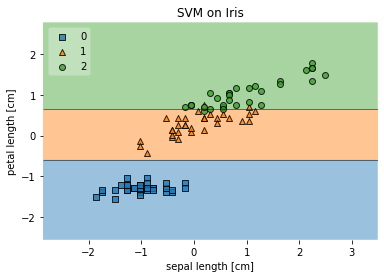

In [ ]:

# Plotting decision regions
plot_decision_regions(X_train, y_train, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

## Trying different combinations:

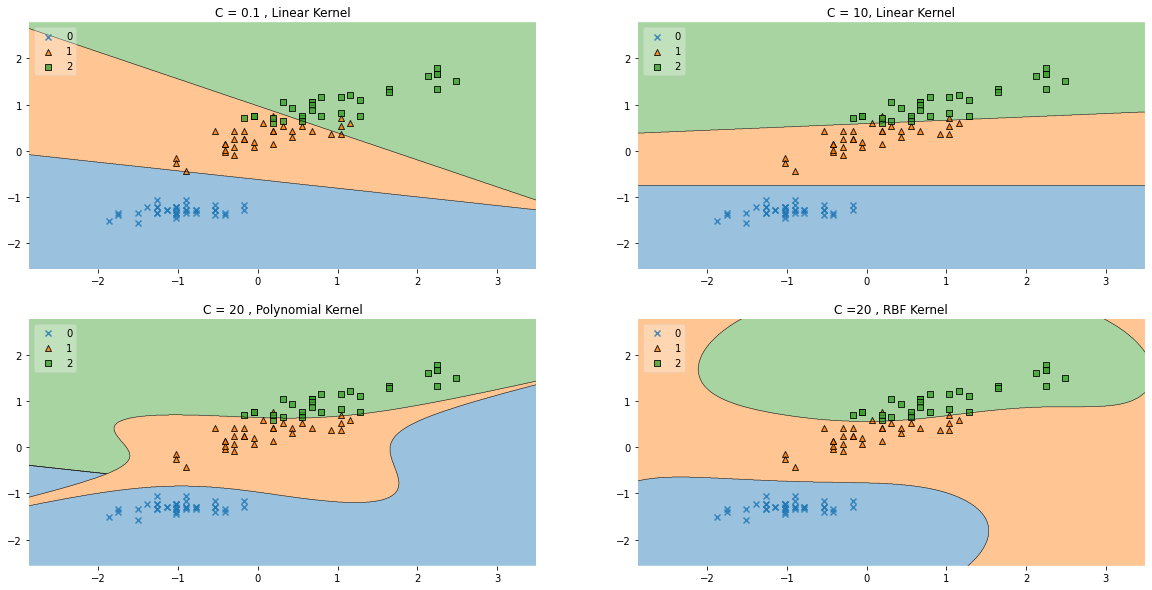

In [ ]:
gs = gridspec.GridSpec(2, 2)

plt.rcParams['figure.figsize'] = (20, 10)

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.1 , Linear Kernel' , 'C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C =20 , RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

- Increasing C, increases bias, reduces the variance (we become more tolerant of violations to the margin, margin will widen)

- Decreasing C, reduces bias, increases variance (we become less tolerant of violations to the margin, margin narrows)

# CODE: SVM with a non-linear Dataset

We are going to work with a synthatic dataset composed of the XOR gate

<img src = https://www.bogotobogo.com/python/scikit-learn/images/svm2/XOR-GATE.png>

## Generate the dataset

In [ ]:
np.random.seed(0) ## to reproduce the results
X_xor = np.random.randn(500, 2) ## Generate 500 itegers
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:,1] > 0, dtype = int) ## Output
y_xor = np.where(y_xor, 0 , 1)

## Split the dataset


In [ ]:

X_xor, y_xor = shuffle_arrays_unison(arrays=[X_xor, y_xor], random_seed=42)

X_train, y_train = X_xor[:400], y_xor[:400]
X_test, y_test = X_xor[400:], y_xor[400:]

## Train Different Kernels

C:\Users\Fatma Moanes\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


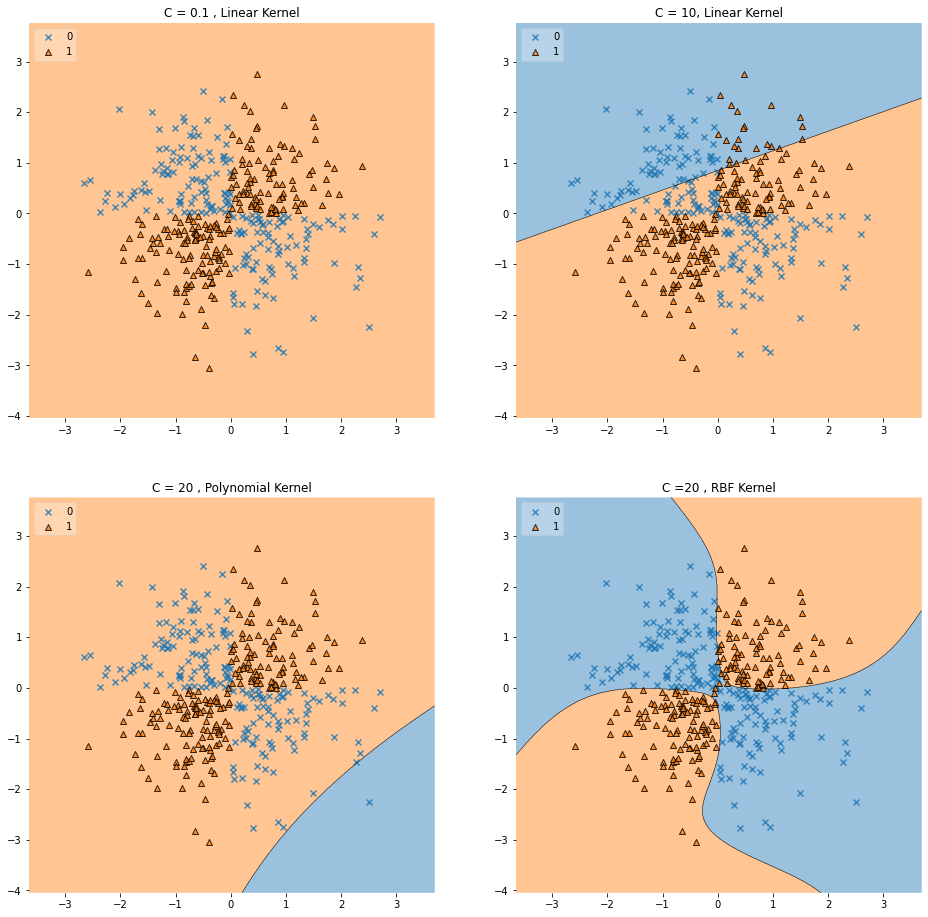

In [ ]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.1 , Linear Kernel' , 'C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C =20 , RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

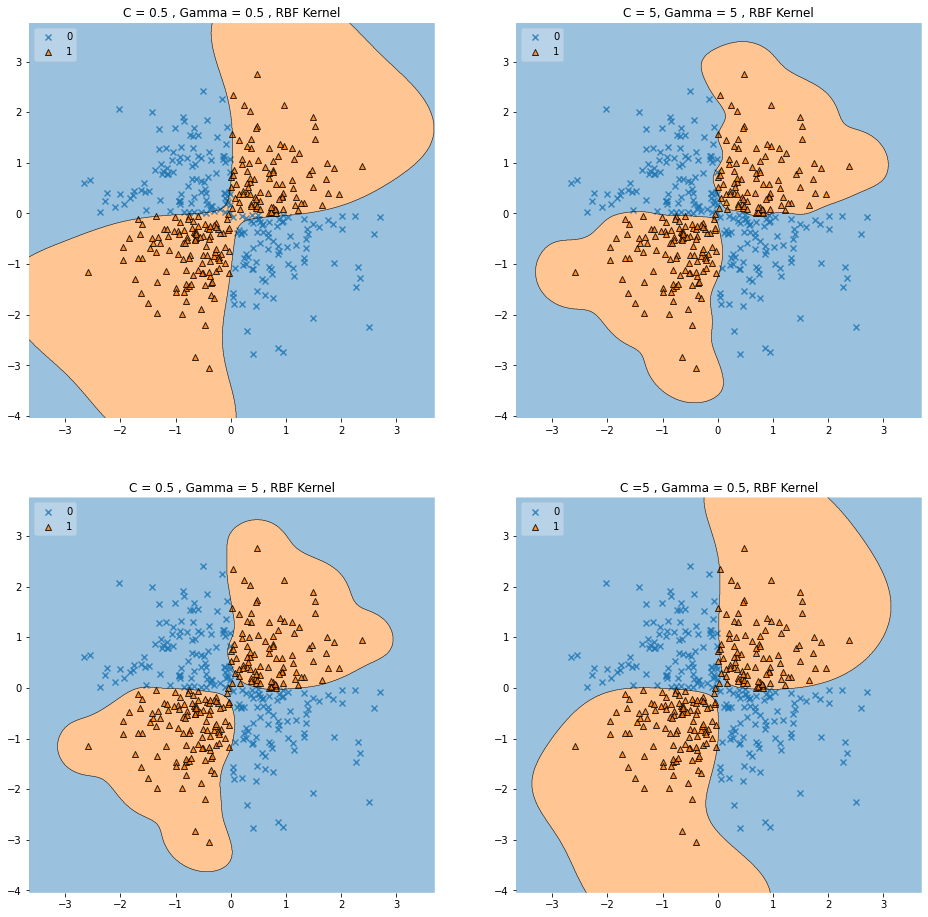

In [ ]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))

clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=5, kernel='rbf', gamma = 5)
clf3 = SVC(C=0.5, kernel='rbf', gamma = 5)
clf4 = SVC(C=5, kernel='rbf', gamma = 0.5)
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.5 , Gamma = 0.5 , RBF Kernel' , 'C = 5, Gamma = 5 , RBF Kernel', 'C = 0.5 , Gamma = 5 , RBF Kernel'  ,'C =5 , Gamma = 0.5, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

- Smaller gamma value makes the bell shaped curve wider
- Instances have a larger range of influence
- The decision boundary ends up smoother.

# Cross Validation

## Dataset

We are going to use a Speech Recoginition Dataset!

We will follow [this](https://www.kaggle.com/nirajvermafcb/support-vector-machine-detail-analysis) Kernel

**[Gender Recognition by Voice and Speech Analysis](https://www.kaggle.com/primaryobjects/voicegender)**

- This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. 


- The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. 


- The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz

### Dataset Features

The following acoustic properties of each voice are measured and included within the CSV:

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute - difference between adjacent measurements of fundamental frequencies divided by the frequency range


- **label: male or female**

## Load the dataset

In [ ]:
df = pd.read_csv("voice.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'voice.csv'

## Finding correlations

In [ ]:
df.corr()

## Any null values?

In [ ]:
print(df.isnull().sum())
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))


## Data Seperating, Encoding, and Standarization

In [ ]:
X=df.iloc[:, :-1]
X.head()

## Encoding
y=df.iloc[:,-1]
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)

## Standard
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


## Running SVM with default hyperparamters

In [ ]:
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score for default parameters:')
print(metrics.accuracy_score(y_test,y_pred))

## Running SVM with different Kernels but with their default hyperparameters

In [ ]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score Linear:')
print(metrics.accuracy_score(y_test,y_pred))
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score RBF:')
print(metrics.accuracy_score(y_test,y_pred))
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score Polynomial:') #Polynomial kernel is performing poorly.The reason behind this maybe it is overfitting the training dataset
print(metrics.accuracy_score(y_test,y_pred))

**From the above analysis, we will investigate different hyperparameters for Linear and RBF kernels only, since Polynomial performance is much worse.**

## CV with Linear Kernel

In [ ]:
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

## CV with RBF Kernel

In [ ]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

## Check the C hyperparameter in depth for the Linear Kernel

In [ ]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

**From the above plot we can see that accuracy has been close to 97% for C=1 and C=6 and then it drops around 96.8% and remains constant.**



In [ ]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

## Check The Gamma hyperparameter in RBF Kernel

In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

**We can see that for gamma=10 and 100 the kernel is performing poorly.We can also see a slight dip in accuracy score when gamma is 1.Let us look into more details for the range 0.0001 to 0.1.**



In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

**The score increases steadily and raches its peak at 0.01 and then decreases till gamma=1.Thus Gamma should be around 0.01.**

In [ ]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

## Grid Search

In [ ]:
tuned_parameters = {
    'C':  (np.arange(0.1,1,0.1)),
        'gamma':[0.01,0.02,0.03,0.04,0.05],
    
     "kernel":[ 'rbf', 'linear']

}
svm_model= SVC()

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_score_)
print(model_svm.best_params_)


In [ ]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

# Multi-class SVM

SVM only considers two classes

For m-class classification problem:
- SVM 1 learns “Output==1” vs “Output != 1”
- SVM 2 learns “Output==2” vs “Output != 2”

- SVM m learns “Output==m” vs “Output != m”


 To predict the output for a new input, just predict with each SVM
and find out which one puts the prediction the furthest into the
positive region

# SVM for Regression

We can use SVMs for regression instead of classification.

- the trick is to reverse the objective


- instead of trying to fit the largest possible margin between two classes while limiting margin violations.


- SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).

<img src=https://i.ibb.co/v1X2V9P/10.jpg>

# Resources:

This lab took a lot of time and resources to prepare. 
Take a look at the resourcses below. They are super helpful!

http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions


https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Support_Vector_Machines_SVM_2.php


https://towardsdatascience.com/understanding-the-kernel-trick-e0bc6112ef78


https://www.datasciencecentral.com/profiles/blogs/implementing-a-soft-margin-kernelized-support-vector-machine
https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

https://www.cs.umd.edu/~samir/498/SVM.pdf

https://people.csail.mit.edu/dsontag/courses/ml14/slides/lecture2.pdf

https://www.vebuso.com/2020/02/a-top-machine-learning-algorithm-explained-support-vector-machines-svms/


https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496


https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

http://web.mit.edu/6.034/wwwbob/svm.pdf

Hands on machine learning with scikit learn and tensorflow by Aurélien Géron , Chapter



# Tasks

- Task 1  [7 Points]: Work with [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews)
    - Perform proper preprocessing and visualization
    - Perform proper hyperparameter tuning **-SVM-**. JUSTIFY ALL THE HYPERPARAMETER VALUES
    - **Hint**: Check [this](https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589) tutorial and this [kernel](https://www.kaggle.com/laowingkin/amazon-fine-food-review-sentiment-analysis) for help 

## Reading the Dataset

In [ ]:
! pip install -q kaggle

files.upload() # Browse for the kaggle.json file that you downloaded

# Make directory named kaggle, copy kaggle.json file there, and change the permissions of the file.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# You can check if everything's okay by running this command.
! kaggle datasets list

# Download and unzip sign-language-mnist dataset into '/usr/local'
! kaggle datasets download -d snap/amazon-fine-food-reviews 

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                            title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
arashnic/hr-analytics-job-change-of-data-scientists            HR Analytics: Job Change of Data Scientists        295KB  2020-12-07 00:25:10           1192  
babyoda/access-to-computers-from-home-oecd                     Access to Computers From Home OECD                   3KB  2020-12-04 10:50:09            100  
shashwatwork/impact-of-covid19-pandemic-on-the-global-economy  Impact of Covid-19 Pandemic on the Global Economy    1MB  2020-11-29 14:16:30            602  
emmanuelleai/world-marathons-majors                            World Marathons Majors                           

In [ ]:
! mkdir train
! unzip amazon-fine-food-reviews.zip -d train

mkdir: cannot create directory ‘train’: File exists
Archive:  amazon-fine-food-reviews.zip
replace train/Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace train/database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace train/hashes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [ ]:
df = pd.read_csv('train/Reviews.csv')

## Preprocessing

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.describe(percentiles=[0.25,0.5,0.75,0.8,0.85,0.9,0.95])

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
80%,454763.400000,2.000000,3.00000,5.000000,1.336608e+09
85%,483186.050000,3.000000,4.00000,5.000000,1.340582e+09
90%,511608.700000,4.000000,5.00000,5.000000,1.344470e+09


In [ ]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['ProfileName'].duplicated().sum()

350037

In [ ]:
df['ProductId'].duplicated().sum()

494196

In [ ]:
df_text_dupl = df[df['Text'].duplicated()]
df_text_dupl.head(20)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
603,604,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,1229385600,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2336,2337,B0001FQVCK,A5D06XJHDXK75,C. Po,1,1,5,1190592000,"Baci's are pure heaven - great gift, stocking ...",My family has been in love with Baci's ever si...
2647,2648,B0016FY6H6,A2NLZ3M0OJV9NX,Mark Bodzin,0,0,2,1313107200,way too weak for my tastes,"What can i say, I love iced tea. I drink a lot..."
2653,2654,B0016FY6H6,A3I4PCBRENJNG2,L. Cain,0,0,4,1300579200,quality lightly sweetened green tea powder,lots of uses for this green tea...<br /><br />...
2946,2947,B0002TJAZK,A2ISKAWUPGGOLZ,M. S. Handley,0,1,1,1310774400,Kitty Junk Food,We have five cats - one an elderly cat of 15 y...


In [ ]:
df_text_dupl.sort_values('Summary').head(20)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
117168,117169,B002AU4V94,A129QMC08SW3T3,"C. Clinger ""CatMa""",4,5,5,1240012800,! Mmmmmmmmmm !,What a wonderful surprise to find LUCY's on Am...
426709,426710,B00213EU7I,A129QMC08SW3T3,"C. Clinger ""CatMa""",4,5,5,1240012800,! Mmmmmmmmmm !,What a wonderful surprise to find LUCY's on Am...
134062,134063,B002AUCELQ,A129QMC08SW3T3,"C. Clinger ""CatMa""",4,5,5,1240012800,! Mmmmmmmmmm !,What a wonderful surprise to find LUCY's on Am...
262196,262197,B002AU3K1E,A129QMC08SW3T3,"C. Clinger ""CatMa""",4,5,5,1240012800,! Mmmmmmmmmm !,What a wonderful surprise to find LUCY's on Am...
262677,262678,B00213IAUQ,A129QMC08SW3T3,"C. Clinger ""CatMa""",4,5,5,1240012800,! Mmmmmmmmmm !,What a wonderful surprise to find LUCY's on Am...
288541,288542,B000ENUC3S,APWCOAVILK94B,"Real Named Person ""wowzee""",2,2,5,1289952000,!!!!!!! Flavor review !!!!!!!!,"Best Flavor yet and instant favorite, cant sto..."
482377,482378,B0018KLPFK,APWCOAVILK94B,"Real Named Person ""wowzee""",2,2,5,1289952000,!!!!!!! Flavor review !!!!!!!!,"Best Flavor yet and instant favorite, cant sto..."
98648,98649,B004GW6O9E,APWCOAVILK94B,"Real Named Person ""wowzee""",2,2,5,1289952000,!!!!!!! Flavor review !!!!!!!!,"Best Flavor yet and instant favorite, cant sto..."
542833,542834,B000GB0TMW,A3MWYVPJ5X8MBH,Michael,0,0,5,1349568000,!st time matcha buyer,This is quality matcha tea at a very low price...
324586,324587,B000GB0UGC,A3MWYVPJ5X8MBH,Michael,0,0,5,1349568000,!st time matcha buyer,This is quality matcha tea at a very low price...


In [ ]:
#Check the number of unique values in each column
df.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

In [ ]:
#Checking the values' counts for each column
v_c = {}
for col in df.columns:
    v_c [col] = [df[col].value_counts().sort_values()]
v_c

{'HelpfulnessDenominator': [181         1
  131         1
  113         1
  436         1
  416         1
          ...  
  4       22306
  3       34394
  2       61482
  1      112753
  0      270052
  Name: HelpfulnessDenominator, Length: 234, dtype: int64],
 'HelpfulnessNumerator': [491         1
  258         1
  354         1
  524         1
  866         1
          ...  
  4       16963
  3       29007
  2       53727
  1      116467
  0      303826
  Name: HelpfulnessNumerator, Length: 231, dtype: int64],
 'Id': [2047     1
  16376    1
  18423    1
  20470    1
  22517    1
          ..
  12294    1
  10245    1
  8196     1
  20490    1
  2049     1
  Name: Id, Length: 568454, dtype: int64],
 'ProductId': [B008057XGQ      1
  B001EO5WHC      1
  B0067MCIK0      1
  B000B6MUGU      1
  B000QWBUR4      1
               ... 
  B0026RQTGE    632
  B002QWP8H0    632
  B002QWP89S    632
  B002QWHJOU    632
  B007JFMH8M    913
  Name: ProductId, Length: 74258, dtype: int64],
 'Prof

In [ ]:
#Checking the duplicated values for each column
v_c = {}
for col in df.columns:
    v_c [col] = [df[col].duplicated().sum()]
v_c

{'HelpfulnessDenominator': [568220],
 'HelpfulnessNumerator': [568223],
 'Id': [0],
 'ProductId': [494196],
 'ProfileName': [350037],
 'Score': [568449],
 'Summary': [272711],
 'Text': [174875],
 'Time': [565286],
 'UserId': [312395]}

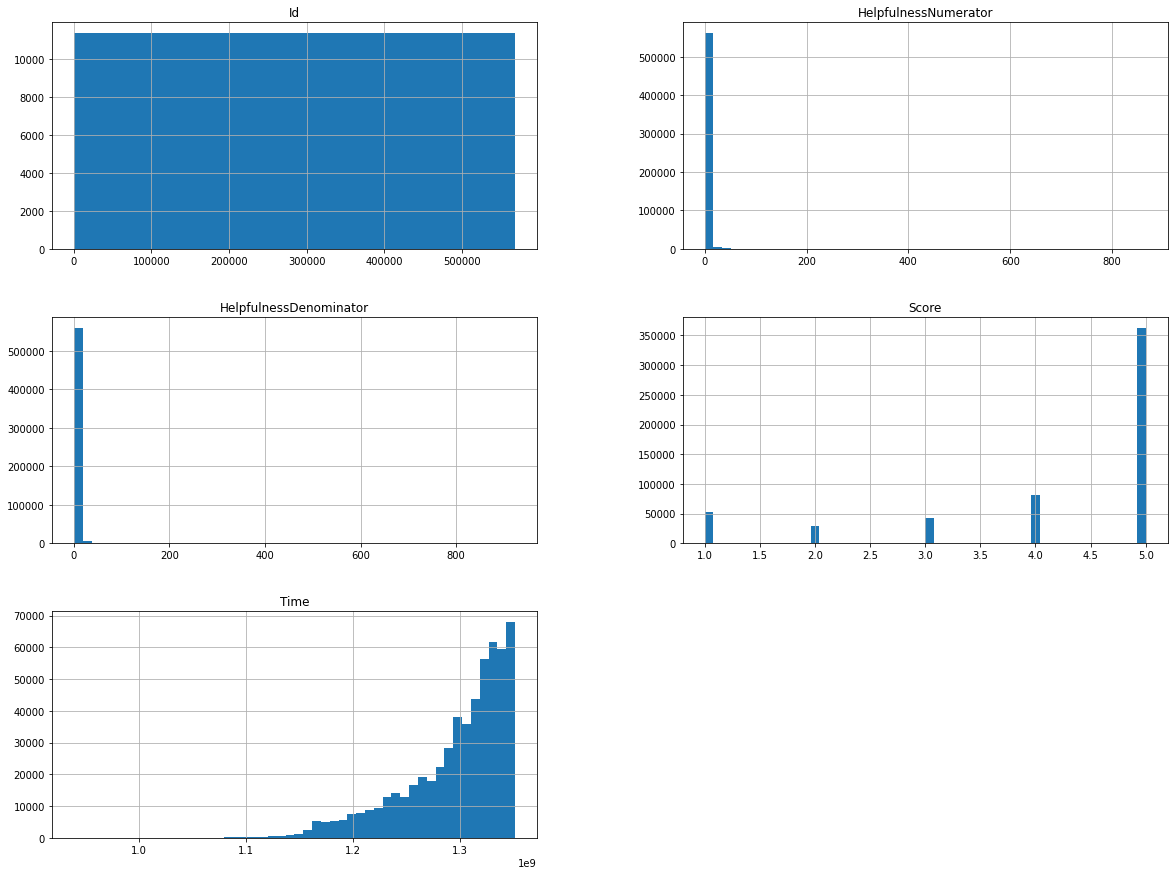

In [ ]:
#Visulaize the attributes
df.hist(bins=50, figsize=(20,15))
plt.show()

### Assessing

1. Null values in `ProfileName` and `Summary` columns.


2. * No 'whole' duplicated rows.

   * There are rows that have duplicated values for the `ProductId`, `UserId`, `ProfileName`, `Score`, `Summary` and `Text`. Their `HelpfulnessNumerator` and `HelpfulnessDenominator` differ according to the `Time`. (The row that has a greater value in `Time` column has a greater `HelpfulnessDenominator` and greater or same value for `HelpfulnessNumerator`).
   * Other rows only differ in `Id` (which is an unneccessary column). 
   * Also some differ in `ProductId`, `HelpfulnessNumerator` and `HelpfulnessDenominator`.
   * Moreover, some rows differ in `Id` and `ProductId` only!!


3. There are some unneccessary columns: `Id`, `Time` and `UserId` **or** `ProfileName` (It's better to keep the `UserId`).


4. `ProfileName` values are inconsistent and do not abide to a certain Name format and some values are not meaningful.


5. From the percentiles, there is a huge gap between the **95% value** and **max value** of `HelpfulnessNumerator` and `HelpfulnessDenumerator`, which indicates the existence of outlieres within these columns.


6. It will be more useful to store `HelpfulnessNumerator`/`HelpfulnessDenominator`. It denotes the percentage of people who found the product helpful compared to all who voted for helpful or not.

### Cleaning

In [ ]:
# First create a copy of the dataset
df_clean = df.copy()

1. * `ProfileName` column will be dropped so we don't have to care about its null values.
   * We can fill in the null values in the `Summary` column using regex. However, it's beyond the scope of this course.

2. * Drop the rows that have the same `UserId`, `ProfileName`, `Score`, `Summary` and `Text` using `Time` column, leave the row that has the highest `Time` value. (Sometimes `ProductId` is the same in these rows and sometimes not. Therefore, one random `ProductId` will remain, it doesn't matter which one).

![title](dupl.png)

   If they have the same `Time`, leave the **highest** `HelpfulnessDenominator`. As it is clear from these rows, at **Time = 1229385600** there was **1** `HelpfulnessDenominator`, then at **Time = 1231718400** we have two rows, one that has **0** `HelpfulnessDenominator` and the other has **2**. Therefore, the value **2 is the correct one**, as the `HelpfulnessDenominator` cannot get smaller as time passes!

In [ ]:
#df2 = df_clean[df_clean.duplicated(subset=['UserId', 'ProfileName', 'Score', 'Summary', 'Text'],  keep=False)]

# Sort the df descendingly according to the Time
df_clean.sort_values(by=['Time','HelpfulnessDenominator'], ascending=False, inplace=True)

# Drop the duplicates keeping the first one (highest Time/ HelpfulnessDenominator)
df_clean.drop_duplicates(subset=['UserId', 'ProfileName', 'Score', 'Summary', 'Text'], keep='first', inplace=True)

#Check the number of unique values in each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395052 entries, 492288 to 150523
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      395052 non-null  int64 
 1   ProductId               395052 non-null  object
 2   UserId                  395052 non-null  object
 3   ProfileName             395041 non-null  object
 4   HelpfulnessNumerator    395052 non-null  int64 
 5   HelpfulnessDenominator  395052 non-null  int64 
 6   Score                   395052 non-null  int64 
 7   Time                    395052 non-null  int64 
 8   Summary                 395049 non-null  object
 9   Text                    395052 non-null  object
dtypes: int64(5), object(5)
memory usage: 33.2+ MB


In [ ]:
#Checking the duplicated values for each column
v_c = {}
for col in df_clean.columns:
    v_c [col] = [df_clean[col].duplicated().sum()]
v_c

{'HelpfulnessDenominator': [394818],
 'HelpfulnessNumerator': [394821],
 'Id': [0],
 'ProductId': [327310],
 'ProfileName': [176635],
 'Score': [395047],
 'Summary': [99309],
 'Text': [1473],
 'Time': [391885],
 'UserId': [138993]}

* Drop the columns that have the same `UserId`, `Summary` and `Text` (Keep the highest Score if the scores are different)


In [ ]:
# Sort the df descendingly according to the Time then Score
df_clean.sort_values(by=['Time','Score'], ascending=False, inplace=True)

# Drop the duplicates keeping the first one (highest Time/ HelpfulnessDenominator)
df_clean.drop_duplicates(subset=['UserId', 'Summary', 'Text'], keep='first', inplace=True)



* Drop the columns that have the same `ProfileName`, `Summary` and `Text` (Keep the highest Score if the scores are different)


In [ ]:
# Sort the df descendingly according to the Time then Score
df_clean.sort_values(by=['Time','Score'], ascending=False, inplace=True)

# Drop the duplicates keeping the first one (highest Time/ HelpfulnessDenominator)
df_clean.drop_duplicates(subset=['ProfileName', 'Summary', 'Text'], keep='first', inplace=True)


*  **Testing**

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394973 entries, 566797 to 150523
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      394973 non-null  int64 
 1   ProductId               394973 non-null  object
 2   UserId                  394973 non-null  object
 3   ProfileName             394962 non-null  object
 4   HelpfulnessNumerator    394973 non-null  int64 
 5   HelpfulnessDenominator  394973 non-null  int64 
 6   Score                   394973 non-null  int64 
 7   Time                    394973 non-null  int64 
 8   Summary                 394970 non-null  object
 9   Text                    394973 non-null  object
dtypes: int64(5), object(5)
memory usage: 33.1+ MB


In [ ]:
#Checking the duplicated values for each column
v_c = {}
for col in df_clean.columns:
    v_c [col] = [df_clean[col].duplicated().sum()]
v_c

{'HelpfulnessDenominator': [394739],
 'HelpfulnessNumerator': [394742],
 'Id': [0],
 'ProductId': [327247],
 'ProfileName': [176561],
 'Score': [394968],
 'Summary': [99230],
 'Text': [1394],
 'Time': [391806],
 'UserId': [138915]}

* Drop the columns that have the same `Text` (Keep the highest Score if the scores are different)

In [ ]:
# Sort the df descendingly according to the Time then Score
df_clean.sort_values(by=['Time','Score'], ascending=False, inplace=True)

# Drop the duplicates keeping the first one (highest Time/ HelpfulnessDenominator)
df_clean.drop_duplicates(subset=['Text'], keep='first', inplace=True)


* **Testing**

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393579 entries, 566797 to 150523
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      393579 non-null  int64 
 1   ProductId               393579 non-null  object
 2   UserId                  393579 non-null  object
 3   ProfileName             393568 non-null  object
 4   HelpfulnessNumerator    393579 non-null  int64 
 5   HelpfulnessDenominator  393579 non-null  int64 
 6   Score                   393579 non-null  int64 
 7   Time                    393579 non-null  int64 
 8   Summary                 393576 non-null  object
 9   Text                    393579 non-null  object
dtypes: int64(5), object(5)
memory usage: 33.0+ MB


In [ ]:
#Checking the duplicated values for each column
v_c = {}
for col in df_clean.columns:
    v_c [col] = [df_clean[col].duplicated().sum()]
v_c

{'HelpfulnessDenominator': [393345],
 'HelpfulnessNumerator': [393348],
 'Id': [0],
 'ProductId': [326041],
 'ProfileName': [175181],
 'Score': [393574],
 'Summary': [98881],
 'Text': [0],
 'Time': [390412],
 'UserId': [137539]}

* Checking if there are any other duplicates that need to be dropped.

In [ ]:
df_clean[df_clean.duplicated(subset=['Summary', 'Text'],  keep=False)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


In [ ]:
df_clean[df_clean['Summary'].duplicated(keep=False)].sort_values(by='Summary', ascending=False)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
48131,48132,B004SRH2B6,A14CS7QYJVLIX1,"Susan M. Barry ""suzieb""",0,0,5,1152057600,zico,I drink this product after hot Yoga and immedi...
47893,47894,B004SRH2B6,A2651U83ADWP6R,aggie,0,0,5,1348790400,zico,I love ZICO. I have Sjogrens and can get dehyd...
555584,555585,B001SAVRMQ,A2PB7547K54Y26,Amos Quito,0,0,1,1322870400,zero stars,"poor quality/old product. Upon grating, nutme..."
469036,469037,B005MQ1XVW,A3OO0PCA2WG3L6,pepper,0,0,1,1349568000,zero stars,not enough info to purchase this product also ...
49824,49825,B000EUIZ8K,AIQRUBULCEZNA,M. Hunerberg,0,0,5,1252368000,zen,great for making iced green tea. same stuff th...
...,...,...,...,...,...,...,...,...,...,...
103092,103093,B001E5E2RM,A22AL0PEWQLHK0,Art Majors,0,0,3,1344988800,"""Classic"" is much better!",I agree with some of the other reviewers. I ha...
129481,129482,B002PO73KY,A22AL0PEWQLHK0,Art Majors,1,1,5,1344988800,"""Classic"" is much better!",I agree with some of the other reviewers (for ...
392529,392530,B001H9XOEW,A22R17YPXEULEZ,Liz Wong,0,0,3,1334534400,NaN,I like the product and tried it before I pucha...
237565,237566,B000ELGPAO,A15AMT9T9A1309,Film-Friend,1,1,3,1328572800,NaN,This is a cool system only problem is that the...


* Duplicates among the Summary don't need to be dropped, as having the same Summary for different reviews can happen.
* However, there are some remaining duplicates for the `Summary` and `Text` that have very slight letter differences. This might be solved using regex, again, beyond the scope of this course.

3. Drop the columns: `Id`, `Time` and `ProfileName` (Keep the `UserId` as it has more unique values).


In [ ]:
# First reset the indeces
df_clean.reset_index(drop=True, inplace=True)

In [ ]:
df_clean.drop(columns=['Id','Time','ProfileName'], inplace=True)

In [ ]:
df_clean.head()

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,B001PQTYN2,A3OTHWG8LLCLMU,1,1,5,Great,"If you like a great , hot, sauce then buy this..."
1,B00171APVA,A21BT40VZCCYT4,0,0,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,B004FD13RW,A1BPLP0BKERV,0,0,5,It is awesome.,"My partner is very happy with the tea, and is ..."
3,B009WSNWC4,AMP7K1O84DH1T,0,0,5,DELICIOUS,Purchased this product at a local store in NY ...
4,B00523NRVO,A2JDXKFZ0PFHKU,0,0,5,The perfect pop!,"These lollipops are are well done, look exactl..."


4. The column `ProfileName` was already dropped.

In [ ]:
df_clean[df_clean['HelpfulnessDenominator'] > 9].sort_values(by='HelpfulnessDenominator', ascending=False)

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
324097,B00012182G,A1JUGIQDY6UYSM,844,923,3,Whole Rabbit - NOT!,"I ordered one of these Fresh ""Whole"" Rabbits, ..."
387779,B000FI4O90,A1GQGYROVZVW49,866,878,5,Works as Advertised - Classy Product,see update at end of review<br /><br />*******...
312564,B001PQTYN2,A1QB2Y8GSME58Y,808,815,5,sauce not for mortals,I purchased a burrito from a small shop a few ...
203416,B001F10XUU,A39V22BIBUMMB3,580,593,1,Lost in Translation: Truth,"This product is called ""Hunmatsu-RyokuCha,"" in..."
362086,B000UUWECC,AU3GYRAKBUAEU,491,569,3,"not bad stuff, but I have serious questions",Coconut water is the liquid inside an unopened...
...,...,...,...,...,...,...,...
381654,B000LQTTVY,A39PE92UTLIR9X,1,10,5,Wonderful Freezer Storage,These Tupperware containers are wonderful. It...
381655,B000LKTEYC,AW1VO5WYU3PL6,10,10,5,Camel Halvah Bars,"Excelent tasting, with little sugar.<br /><br ..."
381656,B000JKPXU8,A3FBPC699DPYFP,10,10,5,Black Truffle Salt,"After you use this product, you will never rea..."
381726,B000EEWZG4,A2Y5P8ISTELDO7,8,10,4,Good stuff,"I used to buy the larger cans, but this is a b..."


5. These values represent 5% of the dataset. However they are approximately 12k rows for the Numerator and 17k rows for the Denominator. We cannot say that they are invalid and we cannot drop these rows.

6. Add a new column `Helpfulness` which is Numerator/Denominator, and drop the `HelpfulnessNumerator` and `HelpfulnessDenominator`.

In [ ]:
df_clean['Helpfulness'] = df_clean.apply(lambda row: row['HelpfulnessNumerator']/row['HelpfulnessDenominator']
               if row['HelpfulnessDenominator'] != 0 else 0, axis=1)

In [ ]:
df_clean.drop(columns=['HelpfulnessNumerator','HelpfulnessDenominator'], inplace=True)
df_clean

,ProductId,UserId,Score,Summary,Text,Helpfulness
0,B001PQTYN2,A3OTHWG8LLCLMU,5,Great,"If you like a great , hot, sauce then buy this...",1.0
1,B00171APVA,A21BT40VZCCYT4,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.0
2,B004FD13RW,A1BPLP0BKERV,5,It is awesome.,"My partner is very happy with the tea, and is ...",0.0
3,B009WSNWC4,AMP7K1O84DH1T,5,DELICIOUS,Purchased this product at a local store in NY ...,0.0
4,B00523NRVO,A2JDXKFZ0PFHKU,5,The perfect pop!,"These lollipops are are well done, look exactl...",0.0
...,...,...,...,...,...,...
393574,B00004CXX9,AJH6LUC1UT1ON,5,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,0.0
393575,B00004RYGX,A344SMIA5JECGM,5,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",0.5
393576,B00004CXX9,AIUWLEQ1ADEG5,5,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,0.0
393577,0006641040,AJ46FKXOVC7NR,5,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,1.0


In [ ]:
# Drop the remaining null values in the Summary 
df_clean.dropna(inplace=True)
df_clean.isnull().sum()

ProductId      0
UserId         0
Score          0
Summary        0
Text           0
Helpfulness    0
dtype: int64

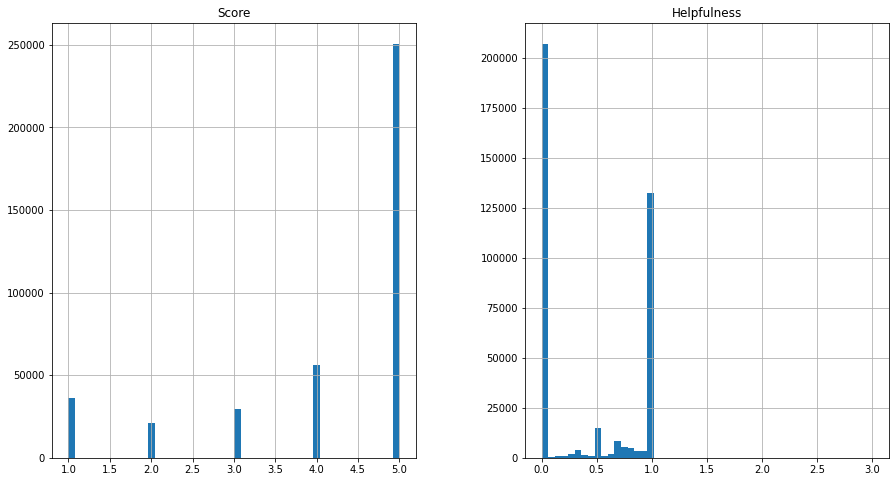

In [ ]:
#Visulaize the attributes
df_clean.hist(bins=50, figsize=(15,8))
plt.show()

In [ ]:
# Check the correlation 
corr_matrix = df_clean.corr()['Score']
corr_matrix.sort_values(ascending=False)[1:]

Helpfulness    0.037726
Name: Score, dtype: float64

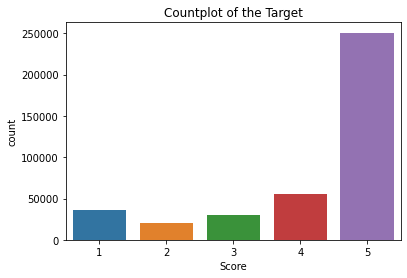

In [ ]:
# Count plot of the target
ax = sns.countplot(x='Score',data=df_clean);
ax.set_title('Countplot of the Target');

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393576 entries, 0 to 393578
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ProductId    393576 non-null  object 
 1   UserId       393576 non-null  object 
 2   Score        393576 non-null  int64  
 3   Summary      393576 non-null  object 
 4   Text         393576 non-null  object 
 5   Helpfulness  393576 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 31.0+ MB


## Sentiment analysis

* First we will get rid of `Score`= 3 reviews (neutral), and separate the remaining reviews into binary class (1 = positive, 0 = negative)

In [ ]:
df_clean = df_clean[df_clean['Score'] != 3]
X = df_clean['Text']

X_num = df_clean[df_clean.columns.difference(['ProductId', 'ProfileId', 'UserId', 'Score'])]

y_dict = {1:0, 2:0, 4:1, 5:1}
y = df_clean['Score'].map(y_dict)

In [ ]:
#c = CountVectorizer(stop_words = 'english')
#tf = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')

english_stemmer = Stemmer.Stemmer('en')

class StemmedTfidfVectorizer(TfidfVectorizer):
     def build_analyzer(self):
         analyzer = super(TfidfVectorizer, self).build_analyzer()
         return lambda doc: english_stemmer.stemWords(analyzer(doc))
     
tf = StemmedTfidfVectorizer(min_df=1, stop_words='english', analyzer='word', ngram_range=(1,2))

In [ ]:
def text_fit(X, y, c, clf_model):
    
    X_c = c.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    print(X_c.shape)
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
  

## SVM

In [ ]:
#text_fit(X, y, c, SVC())

In [ ]:
text_fit(X, y, tf, SVC())

# features: 3369045
(363827, 3369045)
# train records: 272870
# test records: 90957


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, random_state=0)

#svm = svm.SVC().fit(X_train, y_train)
#accuracy = svm.score(X_test, y_test)
#print('SVM accuracy: {}'.format(accuracy))

## Hyperparameter tuning

In [ ]:
tuned_parameters = {
    'C':  (np.arange(0.1,1,0.1)),
        'gamma':[0.01,0.02,0.03,0.04,0.05],
    
     "kernel":[ 'rbf', 'linear']

}
svm_model= SVC()

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')


text_fit(X, y, tf, model_svm)

print(model_svm.best_score_)
print(model_svm.best_score_)
print(model_svm.best_params_)

In [ ]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

# Task 2

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df['Unnamed: 4'].value_counts()

GNT:-)"                                                     2
 Never comfort me with a lie\" gud ni8 and sweet dreams"    1
 just Keep-in-touch\" gdeve.."                              1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
 one day these two will become FREINDS FOREVER!"            1
Name: Unnamed: 4, dtype: int64

## Assessing 

1. Column names are not expressive.


2. The last three columns are useless.

## Cleaning

In [ ]:
df_clean = df.copy()

In [ ]:
# 1-Rename the columns
df_clean.rename(columns={"v1" : 'spam', "v2" : 'message'}, inplace=True)

In [ ]:
# 2-Drop the last three columns
df_clean.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [ ]:
df_clean.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam = pd.get_dummies(df_clean['spam'], drop_first=True)

In [ ]:
df_clean['spam'] = spam

In [ ]:
df_clean

,spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Naive Bayes model

In [ ]:
X = df_clean['message']
y = df_clean['spam']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [ ]:
#Create a Gaussian Classifier
model = MultinomialNB()

# Train the model using the training sets
model.fit(X_train, y_train)

#Predict Output
predicted= model.predict(X_test)
print("Predicted Value:", predicted)

* Task 3 [4 Points] :  BONUS
    - Follow this [tutorial](https://www.mygreatlearning.com/blog/linear-discriminant-analysis-or-lda/) on **LDA** and apply what you learnt on the [Pokemon dataset](https://www.kaggle.com/rounakbanik/pokemon)

    - **Hint**: You can use [this kernel for reference](https://www.kaggle.com/residentmario/linear-discriminant-analysis-with-pokemon-stats)

# Task 3

In [ ]:
df = pd.read_csv('pokemon.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [ ]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [ ]:
df2= df[df['type2'].isnull()].loc[:, [ 'type1','abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'weight_kg',
       'generation', 'is_legendary']]

In [ ]:
df2.columns

Index(['type1', 'abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation',
       'is_legendary'],
      dtype='object')

In [ ]:
l = df['type1'].value_counts().index.tolist()
i=0
dict ={}
for v in l:
    dict[v] = i
    i+=1


In [ ]:
df2['type1'].replace(dict, inplace=True)
df2

,type1,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
3,5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,8.5,1,0
4,5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,19.0,1,0
6,0,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,9.0,1,0
7,0,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1.0,59,Kameilカメール,Wartortle,88.1,8,65,80,58,22.5,1,0
8,0,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,85.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,13,"['Bulletproof', 'Soundproof', 'Overcoat']",1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,55,10240,70,300,45,Scaly Pokémon,65,1250000,0.6,45,Jyarakoジャラコ,Jangmo-o,50.0,782,45,45,45,29.7,7,0
788,4,['Unaware'],2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,29,30720,0,200,45,Nebula Pokémon,31,1250000,0.2,43,Cosmogコスモッグ,Cosmog,NaN,789,29,31,37,0.1,7,1
789,4,['Sturdy'],2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,29,30720,0,400,45,Protostar Pokémon,131,1250000,0.1,43,Cosmovumコスモウム,Cosmoem,NaN,790,29,131,37,999.9,7,1
795,7,['Beast Boost'],1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,89,30720,0,570,30,Glowing Pokémon,71,1250000,3.8,83,Denjyumokuデンジュモク,Xurkitree,NaN,796,173,71,83,100.0,7,1


In [ ]:
# Check the correlation 
corr_matrix = df2.corr()['type1']
corr_matrix.sort_values(ascending=False)[1:]

against_steel        0.534773
against_fairy        0.321718
against_ghost        0.258474
against_water        0.243953
against_ground       0.221639
against_psychic      0.195306
pokedex_number       0.145905
sp_defense           0.132981
attack               0.112523
against_ice          0.112255
against_fire         0.109909
generation           0.108543
defense              0.083654
weight_kg            0.076177
experience_growth    0.067719
base_egg_steps       0.067570
base_total           0.055445
is_legendary         0.034319
sp_attack            0.020402
height_m             0.005764
against_rock        -0.016860
percentage_male     -0.039548
hp                  -0.058667
speed               -0.069707
against_poison      -0.071793
against_flying      -0.092113
base_happiness      -0.092623
against_fight       -0.181213
against_dragon      -0.187586
against_dark        -0.216956
against_normal      -0.248282
against_grass       -0.296114
against_bug         -0.359072
against_el

In [ ]:
#Get the highest correlated features
print(corr_matrix[corr_matrix <-0.2].index);
print(corr_matrix[corr_matrix > 0.2].index);

col =  []

col = corr_matrix[ corr_matrix <-0.2].index.tolist() + corr_matrix[corr_matrix> 0.2].index.tolist()
col

Index(['against_bug', 'against_dark', 'against_electric', 'against_grass',
       'against_normal'],
      dtype='object')
Index(['type1', 'against_fairy', 'against_ghost', 'against_ground',
       'against_steel', 'against_water'],
      dtype='object')


['against_bug',
 'against_dark',
 'against_electric',
 'against_grass',
 'against_normal',
 'type1',
 'against_fairy',
 'against_ghost',
 'against_ground',
 'against_steel',
 'against_water']

We will use these features only in our model

In [ ]:
df_clean = df2[col]

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 3 to 799
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   against_bug       384 non-null    float64
 1   against_dark      384 non-null    float64
 2   against_electric  384 non-null    float64
 3   against_grass     384 non-null    float64
 4   against_normal    384 non-null    float64
 5   type1             384 non-null    int64  
 6   against_fairy     384 non-null    float64
 7   against_ghost     384 non-null    float64
 8   against_ground    384 non-null    float64
 9   against_steel     384 non-null    float64
 10  against_water     384 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 36.0 KB


In [ ]:
df_clean.head()

,against_bug,against_dark,against_electric,against_grass,against_normal,type1,against_fairy,against_ghost,against_ground,against_steel,against_water
3,0.5,1.0,1.0,0.5,1.0,5,0.5,1.0,2.0,0.5,2.0
4,0.5,1.0,1.0,0.5,1.0,5,0.5,1.0,2.0,0.5,2.0
6,1.0,1.0,2.0,2.0,1.0,0,1.0,1.0,1.0,0.5,0.5
7,1.0,1.0,2.0,2.0,1.0,0,1.0,1.0,1.0,0.5,0.5
8,1.0,1.0,2.0,2.0,1.0,0,1.0,1.0,1.0,0.5,0.5


In [ ]:
X = df_clean.drop(columns='type1')
y = df_clean['type1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

In [ ]:
y_pred=lda.predict(X_test)
print('Accuracy Score RBF:')
print(metrics.accuracy_score(y_test,y_pred))